In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
y_probs = model.predict_proba(X_test)
fpr, tpr, threholds = roc_curve(y_test, y_probs[:,1])
roc_auc = auc(fpr, tpr)

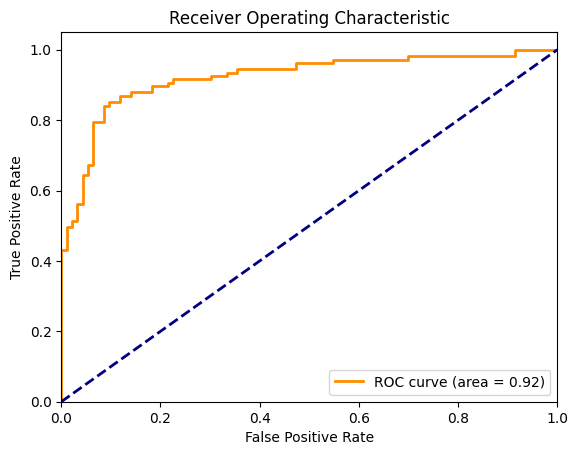

In [7]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

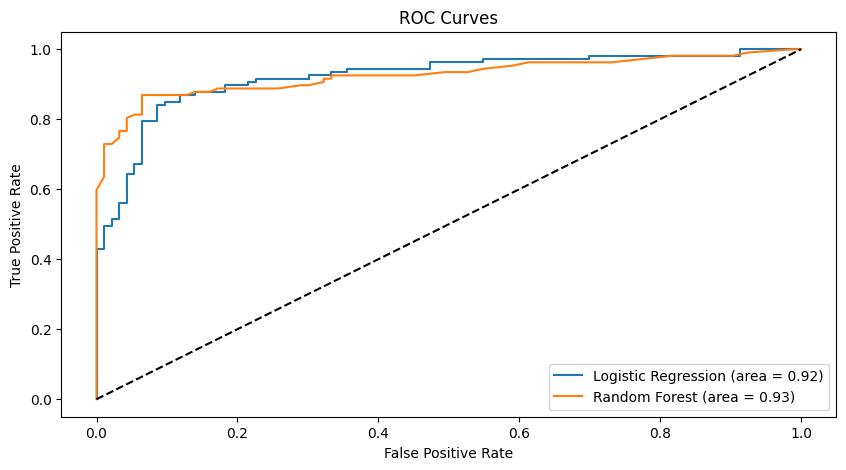

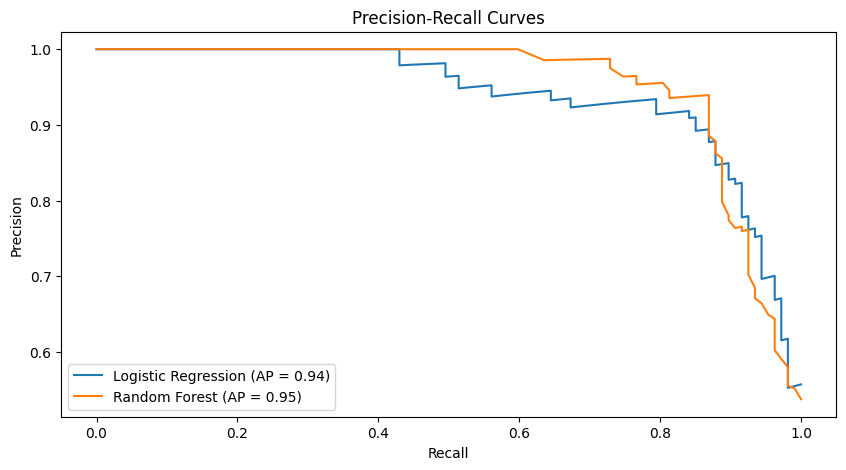

In [9]:


# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
}

# Dictionary to hold performance metrics
roc_metrics = {}
pr_metrics = {}

# Train each model and compute metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]

    # ROC-AUC metrics
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_metrics[name] = (fpr, tpr, roc_auc)

    # Precision-Recall metrics
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    average_precision = average_precision_score(y_test, y_probs)
    pr_metrics[name] = (precision, recall, average_precision)

# Plotting ROC-AUC curves
plt.figure(figsize=(10, 5))
for name, (fpr, tpr, roc_auc) in roc_metrics.items():
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Plotting Precision-Recall curves
plt.figure(figsize=(10, 5))
for name, (precision, recall, average_precision) in pr_metrics.items():
    plt.plot(recall, precision, label=f'{name} (AP = {average_precision:.2f})')
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()


## key takeaways